# Regularizing neural networks

General imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random as rn
import os

Keras specific imports

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, RMSprop
from keras.constraints import maxnorm
from keras.regularizers import l2, l1

Hal pertama yang dilakukan yaitu load data dari file dan plot beberapa contoh

In [3]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:5000]
train_y_short = train_y[:5000]
print(train_x_short.shape)
print(train_y_short.shape)



<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)
(5000, 784)
(5000, 10)


Plot contoh

In [4]:
def plotExamples(data, labels, model_predict):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])) + "," + str(np.argmax(model_predict[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

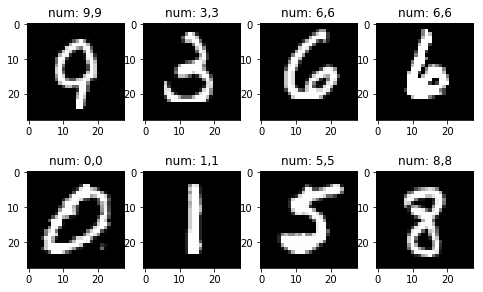

In [5]:
plotExamples(train_x, train_y, train_y)

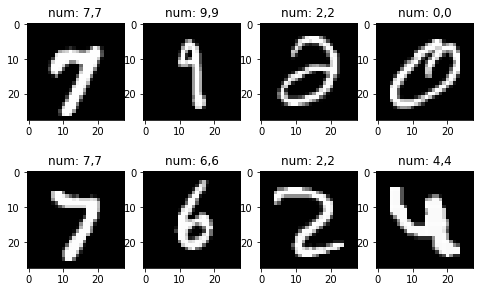

In [6]:
plotExamples(test_x, test_y, test_y)

Motivating example: Beberapa contoh, network dengan kapasitas yang besar

In [14]:
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, epochs=30, validation_split=0.9, verbose=2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
activation_8 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 - 1s - loss: 1.8793 - accuracy: 0.4188 - val_loss: 1.5213 - val_accuracy: 0.5194
Epoch 2/30
16/16 - 1s - loss: 1.0175 - accuracy: 0.7956 - val_loss: 1.1645 - val_accuracy: 0.6996
Epoch 3/30
16/16 - 1s - loss: 0.6859 - accuracy: 0

Helper functions

In [15]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = 1.0 * np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))
    
def get_correct_and_incorrect(model, test_x, test_y):
    result = model.predict(test_x)
    correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    test_x_correct = test_x[correct_indices]
    test_y_correct = test_y[correct_indices]
    predict_test_y_correct = result[correct_indices]
    incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
    test_x_incorrect = test_x[incorrect_indices]
    test_y_incorrect = test_y[incorrect_indices]
    predict_test_y_incorrect = result[incorrect_indices]
    return test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect, predict_test_y_correct, predict_test_y_incorrect

In [16]:
accuracy(test_x, test_y, model)

Accuracy on data is: 80.25999999999999%


Setelah selesai kita dapatkan hasil akurasinya yaitu 80.25999999999999%

Sumber : https://github.com/lgraesser/Intro-to-Neural-Networks-O-Reilly-AI/blob/master/KerasIntro_Regularization.ipynb